<a href="https://colab.research.google.com/github/MagdaliniLytra/Machine-Learning-AI-Master/blob/main/ML_Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import umap

In [52]:
df = pd.read_csv('/content/bankloan.csv')
df.head()

,Row ID,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
0,1.0,60516983,64537751,20000,20000,36 months,12.29,667.06,C,C1,...,INDIVIDUAL,NaN,NaN,0,0,52303,41000,NaN,1.0,0.0
1,2.0,60187139,64163931,11000,11000,36 months,12.69,369.00,C,C2,...,INDIVIDUAL,NaN,NaN,0,332,175731,13100,NaN,1.0,0.0
2,3.0,60356453,64333218,7000,7000,36 months,9.99,225.84,B,B3,...,INDIVIDUAL,NaN,NaN,0,0,202012,16300,NaN,1.0,0.0
3,4.0,59955769,63900496,10000,10000,36 months,10.99,327.34,B,B4,...,INDIVIDUAL,NaN,NaN,0,0,108235,34750,NaN,1.0,0.0
4,5.0,58703693,62544456,9550,9550,36 months,19.99,354.87,E,E4,...,INDIVIDUAL,NaN,NaN,0,0,45492,14100,NaN,1.0,0.0


In [53]:
df.describe()

,Row ID,id,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,...,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
count,368.000000,2.129990e+05,2.129990e+05,212999.000000,212999.000000,212999.000000,212999.000000,2.129990e+05,212999.000000,212999.000000,...,62365.000000,441.000000,439.000000,212999.000000,212999.000000,2.129990e+05,2.129990e+05,0.0,511.000000,511.000000
mean,184.500000,6.103515e+07,6.515927e+07,15257.965530,15257.965530,12.401658,440.842921,7.780071e+04,19.360817,0.347462,...,45.468356,107574.096327,18.320114,0.005718,261.951652,1.416537e+05,3.444425e+04,NaN,0.622309,0.377691
std,106.376689,4.734904e+06,5.215173e+06,8611.713377,8611.713377,4.249365,245.858646,8.188065e+04,31.925871,0.921209,...,22.645675,47921.057382,7.230012,0.081045,2215.188372,1.568766e+05,3.531827e+04,NaN,0.485285,0.485285
min,1.000000,5.670500e+04,7.082500e+04,1000.000000,1000.000000,5.320000,30.120000,0.000000e+00,0.000000,0.000000,...,0.000000,17950.000000,3.050000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000
25%,92.750000,5.783411e+07,6.158651e+07,8500.000000,8500.000000,9.170000,262.230000,4.700000e+04,12.660000,0.000000,...,28.000000,75001.000000,13.185000,0.000000,0.000000,3.143300e+04,1.460000e+04,NaN,0.000000,0.000000
50%,184.500000,6.137900e+07,6.549753e+07,14000.000000,14000.000000,12.290000,382.870000,6.500000e+04,18.720000,0.000000,...,45.000000,100000.000000,17.750000,0.000000,0.000000,8.138600e+04,2.510000e+04,NaN,1.000000,0.000000
75%,276.250000,6.503778e+07,6.956436e+07,20000.000000,20000.000000,14.650000,578.790000,9.250000e+04,25.520000,0.000000,...,63.000000,131000.000000,22.650000,0.000000,0.000000,2.097080e+05,4.260000e+04,NaN,1.000000,1.000000
max,368.000000,6.861687e+07,7.351969e+07,35000.000000,35000.000000,28.990000,1445.460000,9.000000e+06,9999.000000,30.000000,...,171.000000,410000.000000,43.860000,5.000000,380757.000000,4.127799e+06,1.641300e+06,NaN,1.000000,1.000000


In [ ]:
profile = ProfileReport(df, title="Profiling Report")
profile

The dataset indicates that the minimum loan amount requested by candidates is 1,000, the maximum is 35,000, and the average loan amount is 15,257.

# Preprocessing

## Removing unnecessary columns

Removing features that have no predictive value (for example ids) are redundant or contain too many missing and null values to be useful, also I removed the categorical values.

In [54]:
df=df.drop(['member_id', 'id', 'Row ID','annual_inc_joint','dti_joint','Unnamed: 50','emp_title', 'emp_length', 'title', 'mths_since_last_delinq',
       'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'mths_since_last_major_derog', '36months', '60months','application_type','home_ownership','term','verification_status','issue_d','loan_status','purpose','earliest_cr_line','initial_list_status'],axis=1)

## Imputation method for missing values

There are still some missing values in the dataset and since the columns with the most missing values were removed before, an imputation method using `median` for numerical values.

In [55]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

In [56]:
# accept loan if grade = A or sub_grade = B1 or B2, so 1:loan granted and 0:loan rejected
df['loan_granted'] = df.apply(
    lambda row: 1 if (row['grade'] == 'A' or row['sub_grade'] in ['B1', 'B2']) else 0,
    axis=1
)

#distribution of granted vs not granted
print(df['loan_granted'].value_counts())

loan_granted
0    151709
1     61290
Name: count, dtype: int64


In [57]:
df.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_granted
0,20000.0,20000.0,12.29,667.06,C,C1,65000.0,20.72,0.0,1.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,52303.0,41000.0,0
1,11000.0,11000.0,12.69,369.00,C,C2,40000.0,24.57,0.0,0.0,...,0.0,0.0,0.0,10059.00,0.0,0.0,332.0,175731.0,13100.0,0
2,7000.0,7000.0,9.99,225.84,B,B3,32000.0,32.41,0.0,1.0,...,0.0,0.0,0.0,225.84,0.0,0.0,0.0,202012.0,16300.0,0
3,10000.0,10000.0,10.99,327.34,B,B4,48000.0,30.98,0.0,2.0,...,0.0,0.0,0.0,327.34,0.0,0.0,0.0,108235.0,34750.0,0
4,9550.0,9550.0,19.99,354.87,E,E4,32376.0,32.54,0.0,3.0,...,0.0,0.0,0.0,354.87,0.0,0.0,0.0,45492.0,14100.0,0


In [58]:
# remove leakage variables
df = df.drop(columns=['grade', 'sub_grade', 'int_rate','total_rec_int'])

In [59]:
df.head()

,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_granted
0,20000.0,20000.0,667.06,65000.0,20.72,0.0,1.0,25.0,0.0,31578.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,52303.0,41000.0,0
1,11000.0,11000.0,369.00,40000.0,24.57,0.0,0.0,13.0,1.0,5084.0,...,0.0,0.0,0.0,10059.00,0.0,0.0,332.0,175731.0,13100.0,0
2,7000.0,7000.0,225.84,32000.0,32.41,0.0,1.0,18.0,0.0,12070.0,...,0.0,0.0,0.0,225.84,0.0,0.0,0.0,202012.0,16300.0,0
3,10000.0,10000.0,327.34,48000.0,30.98,0.0,2.0,18.0,0.0,22950.0,...,0.0,0.0,0.0,327.34,0.0,0.0,0.0,108235.0,34750.0,0
4,9550.0,9550.0,354.87,32376.0,32.54,0.0,3.0,9.0,0.0,4172.0,...,0.0,0.0,0.0,354.87,0.0,0.0,0.0,45492.0,14100.0,0


# Normalisation

Standardization (Z-score scaling) is the more suitable normalisation method, cause the dataset is skewed and has outliers, as presented in the profile.

In [60]:
X = df.drop(columns=['loan_granted'])
cols=X.columns
y = df['loan_granted']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/Test split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y ,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((149099, 23), (149099,), (63900, 23), (63900,))

# Model Training

KNN is a suitable modeling choice, as the primary goal is to efficiently classify a large number of loan applicants. Given the substantial size of the dataset, KNN offers the advantage of minimal training time, since it is an algorithm that stores the training instances and computes predictions based on distance metrics at inference. This makes it particularly effective for scenarios where rapid model training is required, while still providing reasonable classification performance.

In [177]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.88      0.84     45513
           1       0.62      0.51      0.56     18387

    accuracy                           0.77     63900
   macro avg       0.72      0.69      0.70     63900
weighted avg       0.76      0.77      0.76     63900



# Cross-validation and fine-tuning

In [193]:
param_grid = {
    'n_neighbors': [5, 10, 15]
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'n_neighbors': 15}
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     45513
           1       0.68      0.47      0.56     18387

    accuracy                           0.79     63900
   macro avg       0.75      0.69      0.71     63900
weighted avg       0.77      0.79      0.77     63900



 Precision gives the proportion of predicted “loan approved” candidates who are actually safe to give a loan. Since giving a loan to a risky candidate (a false positive) can result in financial loss, false negatives (rejecting a good candidate) are less costly than false positives, so in this case it should be prioritised high precision.

 Choosing a larger k (like 15) helps smooth out noise and reduces overfitting compared to smaller k values. the model  accuracy is not bad, but can be misleading because classes are imbalanced (more rejections than approvals). The model is very good at correctly identifying candidates who should not get a loan (high recall). Most predictions for this class are correct (good precision). The model struggles to correctly identify candidates who should receive a loan (low recall). About half of the actual eligible candidates are missed (false negatives). Those results are related to the fact that the classes are imbalanced, so the model is probably better at predicting the 0 class since there are more samples than for the 1 class.

# Random Forest

In [62]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     45513
           1       0.97      0.85      0.91     18387

    accuracy                           0.95     63900
   macro avg       0.95      0.92      0.94     63900
weighted avg       0.95      0.95      0.95     63900



In [63]:
param_grid = {
    'max_depth': [5, 10, 15]
}

grid = GridSearchCV(
    model,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best max_depth:", grid.best_params_)

Best max_depth: {'max_depth': 15}


In [67]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45513
           1       1.00      1.00      1.00     18387

    accuracy                           1.00     63900
   macro avg       1.00      1.00      1.00     63900
weighted avg       1.00      1.00      1.00     63900



These results indicate extreme overfitting.

## Feature Importance

In [64]:
importances = model.feature_importances_
feat_imp = pd.DataFrame({
    "feature": cols,
    "importance": importances
}).sort_values("importance", ascending=False)
feat_imp

,feature,importance
2,installment,0.129608
13,total_rec_prncp,0.109905
17,last_pymnt_amnt,0.097598
12,total_pymnt,0.090140
22,total_rev_hi_lim,0.087471
11,out_prncp,0.085069
0,loan_amnt,0.069560
1,funded_amnt,0.069064
4,dti,0.053119
9,revol_bal,0.040667


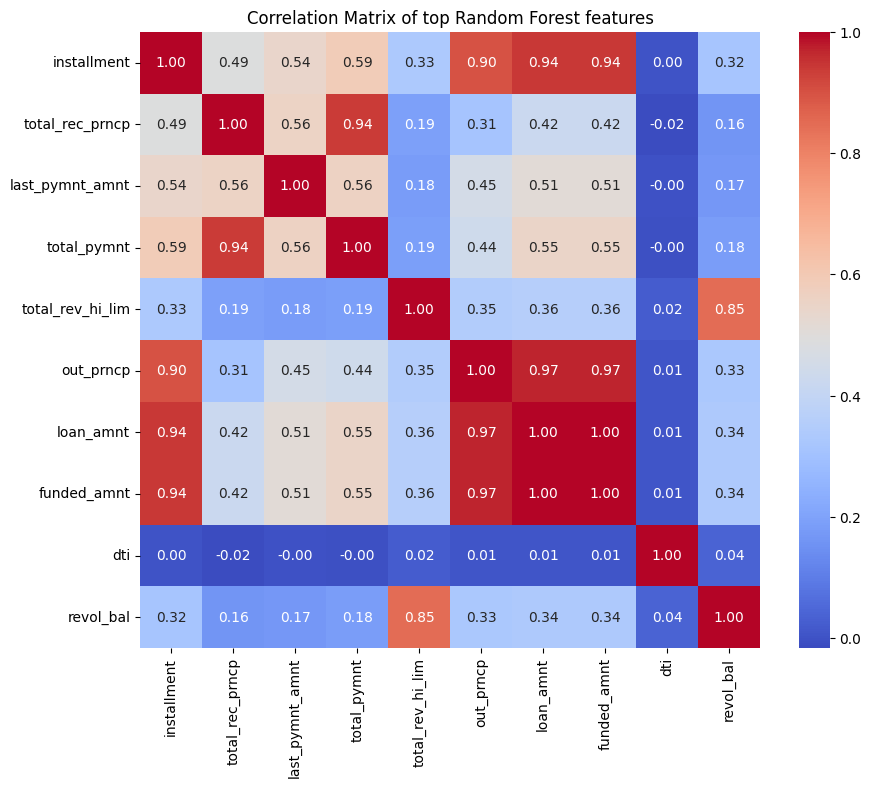

In [65]:
top_features = feat_imp.head(10)['feature'].tolist()
df_top = df[top_features]
corr_matrix = df_top.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of top Random Forest features")
plt.show()

loan_amnt and funded_amnt (1.0) very high correlation, means	they are identical or nearly identical(redundant feature).
loan_amnt and  out_prncp	(0.97) have also very high correlation
installment and  loan_amnt	(0.94)	have also very high correlation, which is expected as monthly payment strongly depends on the loan amount

# Dimensionality Reduction

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [32]:
x_train_reshaped = x_train.reshape(len(x_train), -1).astype("float32")
x_test_reshaped = x_test.reshape(len(x_test), -1).astype("float32")

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_reshaped)
x_test_scaled = scaler.transform(x_test_reshaped)
x_train_scaled.shape, x_test_scaled.shape

((60000, 784), (10000, 784))

In [26]:
pca = PCA(n_components=300)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

x_train_pca.shape, x_test_pca.shape

((60000, 300), (10000, 300))

PCA is fitted to the train data only cause it needs to learn the principal components only from training data. Test data is unseen and only projected onto those learned axes.

In [27]:
ks = [5, 15, 51, 101]
results = {}

for k in ks:
    print(f"\nTraining KNN (k={k})...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_pca, y_train)

    y_pred = knn.predict(x_test_pca)
    acc = accuracy_score(y_test, y_pred)
    results[k] = acc
    print(f"Accuracy for k={k}: {acc:.4f}")


Training KNN (k=5)...
Accuracy for k=5: 0.9497

Training KNN (k=15)...
Accuracy for k=15: 0.9436

Training KNN (k=51)...
Accuracy for k=51: 0.9273

Training KNN (k=101)...
Accuracy for k=101: 0.9158


The results show that as the value of k increases, accuracy decreases. Generally small k values can lead to overfitting. Larger k values cause the classifier to average over more distant neighbors, making it less sensitive to  distinctions between digit classes. This can lead to more smoothing and ultimately more misclassifications.

In [36]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_train_lda = lda.fit_transform(x_train_scaled, y_train)
x_test_lda = lda.transform(x_test_scaled)

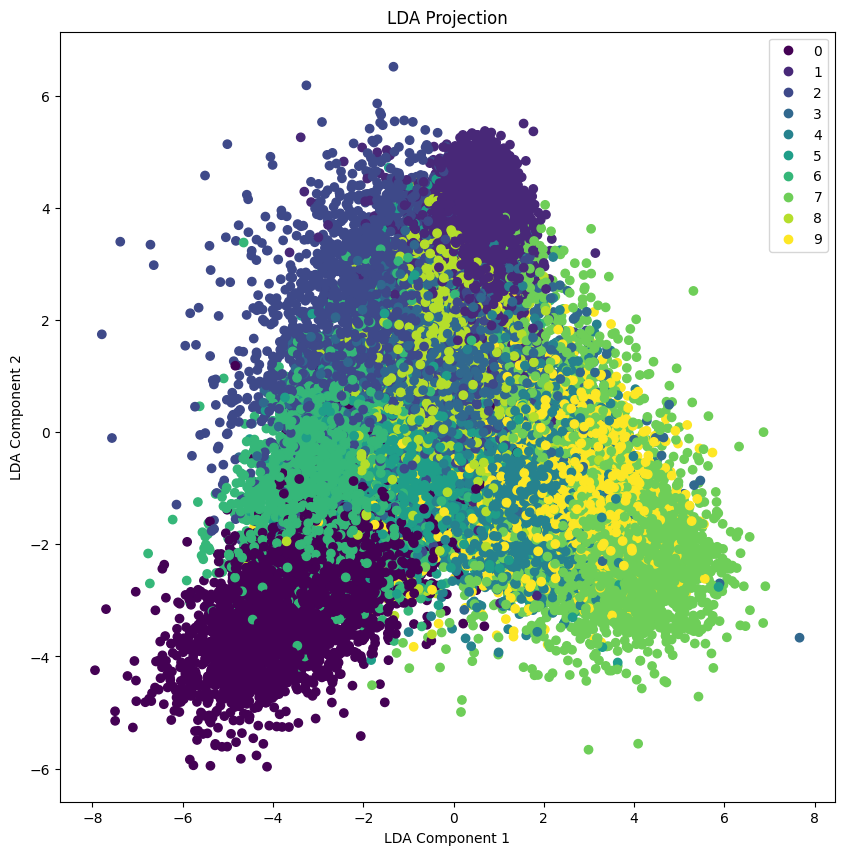

In [49]:
plt.figure(figsize=(10,10))
sc = plt.scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_train)
plt.legend(handles=sc.legend_elements()[0], labels=list(range(10)))
plt.title("LDA Projection")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.show()

There is a significant overlap among the different digit classes. Instead of forming distinct, well separated clusters, most of the  points are heavily overlapping.
That is not ideal preformance for LDA , the classes should be clearly seperated with minimal overlap.

In [39]:
umap_2d = umap.UMAP(n_components=2)
x_train_umap = umap_2d.fit_transform(x_train_scaled)
x_test_umap = umap_2d.transform(x_test_scaled)

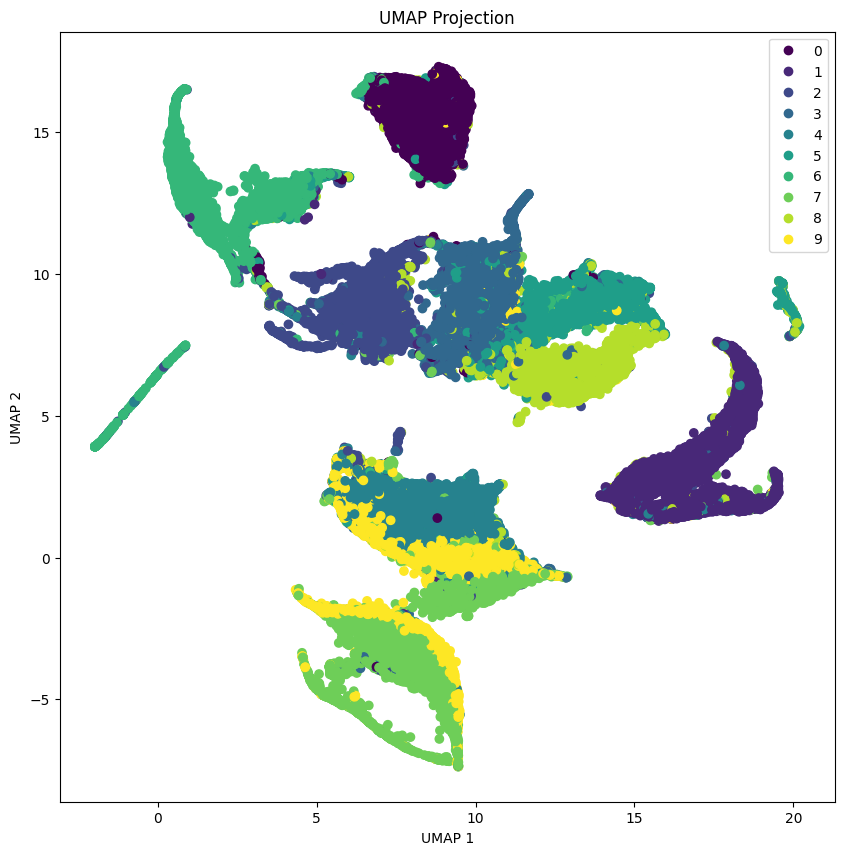

In [48]:
plt.figure(figsize=(10,10))
sc = plt.scatter(x_train_umap[:, 0], x_train_umap[:, 1], c=y_train)
plt.legend(handles=sc.legend_elements()[0], labels=list(range(10)))
plt.title("UMAP Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

The data is resolved into 10 distinct clusters (one for each digit).
LDA tries to find a linear subspace, so it failed because the true distinctions between handwritten digits are non linear, so it is not suitable to visualise these data structures. On the other hand UMAP can captured the non linear geometry of the data, since it is a non linear dimensionality reduction algorithm that projects high dimensional data into a lower dimensional while preserving the essential structure of the data.